# Homework 3: Simple Okada dislocation models

### Problem 1

In [58]:
#Import the relevant modules

from okada_wrapper import dc3dwrapper
import numpy as np
from matplotlib import pyplot as plt


#Coordinates of the observing points in km
Npoints=100
x=np.linspace(-100,100,Npoints)
y=np.linspace(-100,100,Npoints)

First we build a simple vertical strike-slip fault

In [59]:
# Fault description
L=50  #legnth
W=10   #width

# In Okada's defintion "depth" is to the bottom left corenr of the fault plane, so a fault extending from 0 to 10km
# with a vertical dip, will ahve a "depth" of 10.
depth=10 

ss_slip=5 #strike-slip slip positive is rake =0 negative is rake=180
ds_slip=0 #dip-slip slip positive is rake =90 negative is rake=270

alpha=2./3 #This is always 2/3
dip=90

In [60]:
#now loop over all the observation points
ux=np.zeros(Npoints**2)
uy=np.zeros(Npoints**2)
uz=np.zeros(Npoints**2)  #Initalizes output displacememnts

xout=np.zeros(Npoints**2)  #Initalizes otput coordinates
yout=np.zeros(Npoints**2)  #Initalizes otput coordinates

kout=0 #counter to track outputs

for kx in range(len(x)):
    for ky in range(len(y)):
        
        success, u, grad_u = dc3dwrapper(alpha, [x[kx], y[ky], 0.0],
                                 depth, dip, [-L/2, L/2], [-W/2, W/2],
                                 [ss_slip, ds_slip, 0.0])
        
        ux[kout] = u[0]
        uy[kout] = u[1]
        uz[kout] = u[2]
        
        xout[kout]=x[kx]
        yout[kout]=y[ky]
        
        kout+=1
        

Let's plot the results

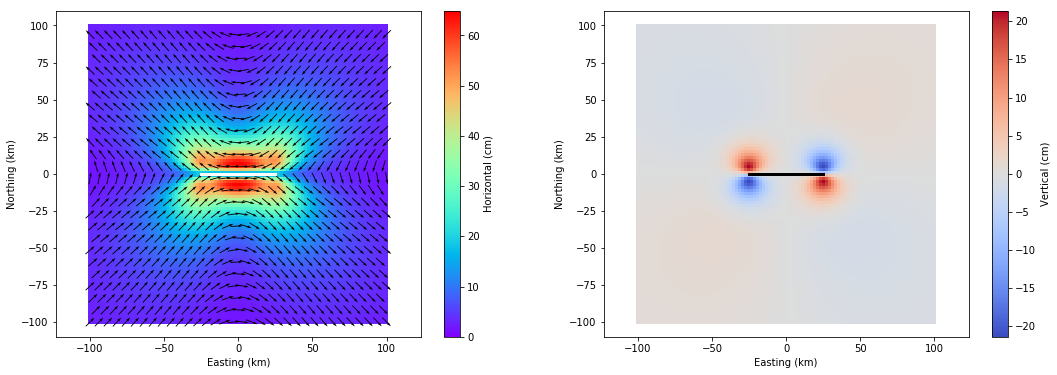

In [61]:
#let's start with the horizontal displacememnt on one panel

decimate=12 #if there are too many arrows, decimate
scatter_size=10
horiz=(ux**2+uy**2)**0.5

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.scatter(xout,yout,c=horiz*100,lw=0,s=scatter_size,vmin=0.0,vmax=horiz.max()*100,cmap='rainbow',marker='s')
cb=plt.colorbar()
cb.set_label('Horizontal (cm)')

#Quiver
i=np.arange(0,len(horiz),decimate)
plt.quiver(xout[i],yout[i],ux[i]/horiz[i],uy[i]/horiz[i],pivot='mid',linewidths=0.01, color='k',scale=30)

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

#plot the fault
plt.plot([-25,25],[0,0],lw=3,c='w')

plt.axis('equal')


plt.subplot(122)
plt.scatter(xout,yout,c=uz*100,lw=0,s=scatter_size,vmin=-max(abs(uz))*100,vmax=max(abs(uz))*100,cmap='coolwarm',marker='s')
cb=plt.colorbar()
cb.set_label('Vertical (cm)')

#quiver
i=np.arange(0,len(horiz),decimate)

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

#plot the fault
plt.plot([-25,25],[0,0],lw=3,c='k')

plt.axis('equal')

plt.show()

### Problem 2

Turn the solutions from the previous problem into a function so you can explore changes to the parameters, simply re-purpose the code from above



In [62]:
def okada(length,width,dip,strike_slip,dip_slip,depth,x,y):
    
    Npoints=len(x)*len(y)
    ux=np.zeros(Npoints)
    uy=np.zeros(Npoints)
    uz=np.zeros(Npoints)  #Initalizes output displacememnts

    xout=np.zeros(Npoints)  #Initalizes otput coordinates
    yout=np.zeros(Npoints)  #Initalizes otput coordinates

    kout=0 #counter to track outputs

    for kx in range(len(x)):
        for ky in range(len(y)):

            success, u, grad_u = dc3dwrapper(alpha, [x[kx], y[ky], 0.0],
                                     depth, dip, [-L/2, L/2], [-W/2, W/2],
                                     [strike_slip, dip_slip, 0.0])

            ux[kout] = u[0]
            uy[kout] = u[1]
            uz[kout] = u[2]

            xout[kout]=x[kx]
            yout[kout]=y[ky]

            kout+=1
            
    return ux,uy,uz
    

Assume the same length, width, and depth as before and let's change rake in small increments from 0 (strike-slip) to 90 (pure thrust). Apply 1m of slip in all cases and recall that given some slip $s$ and some rake $\lambda$ the amount of dip-slip ($ds$) and strike-slip ($ss$) is simply:

$ss=s*\cos(\lambda)$

and

$ds=s*\sin(\lambda)$

In [63]:
#Rake values to explore
rake = np.deg2rad(np.arange(0,90,0.2))

#Assocaited ds and ss
ss = np.cos(rake)
ds = np.sin(rake)

#fault parameters
length=50
width=10
depth=10
dip=0

#Coordinates of the observing points in km
Npoints=100
x=np.linspace(-60,60,Npoints)
y=np.linspace(-60,60,Npoints)

#i nitalize utput variables
peak_horiz = np.zeros(len(rake))
peak_vert = np.zeros(len(rake))

#And using the same x and y as before let's obtain the peak horizontal and vertical deformation for each rake
for krake in range(len(rake)):
    
    if krake%50 == 0:
        print('Working on rake %d of %d' % (krake,len(rake)))
    
    ux,uy,uz = okada(length,width,dip,ss[krake],ds[krake],depth,x,y)
    
    #Peak values
    peak_horiz[krake] = max((ux**2+uy**2)**0.5)
    peak_vert[krake] = max(abs(uz))

Working on rake 0 of 450
Working on rake 50 of 450
Working on rake 100 of 450
Working on rake 150 of 450
Working on rake 200 of 450
Working on rake 250 of 450
Working on rake 300 of 450
Working on rake 350 of 450
Working on rake 400 of 450


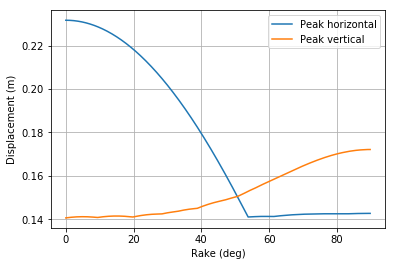

In [64]:
#make a plot to check results
rake_in_degs = np.rad2deg(rake)
plt.figure()
plt.plot(rake_in_degs,peak_horiz,label='Peak horizontal')
plt.plot(rake_in_degs,peak_vert,label='Peak vertical')
plt.grid()
plt.xlabel('Rake (deg)')
plt.ylabel('Displacement (m)')
plt.legend()

In [65]:
#find more rpecisely where the crossover occurs
i=np.where(peak_vert>peak_horiz)[0]
print('Vertical is larger than horizontal for rake > %.1f' % rake_in_degs[i[0]])

Vertical is larger than horizontal for rake > 50.8


Not surprisingly the change over occurs close to, but not exactly, at 45  degrees. Plot it just to check it makes sense

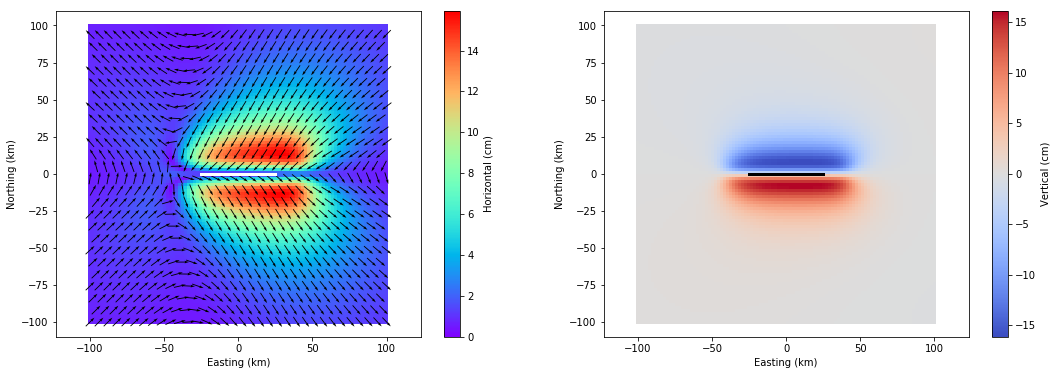

In [66]:
#get values for that rake
ss=np.cos(rake[i[0]])
ds=np.sin(rake[i[0]])

ux,uy,uz = okada(length,width,90,ss,ds,depth,x,y)

decimate=12 #if there are too many arrows, decimate
scatter_size=10
horiz=(ux**2+uy**2)**0.5

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.scatter(xout,yout,c=horiz*100,lw=0,s=scatter_size,vmin=0.0,vmax=horiz.max()*100,cmap='rainbow',marker='s')
cb=plt.colorbar()
cb.set_label('Horizontal (cm)')

#Quiver
i=np.arange(0,len(horiz),decimate)
plt.quiver(xout[i],yout[i],ux[i]/horiz[i],uy[i]/horiz[i],pivot='mid',linewidths=0.01, color='k',scale=30)

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

#plot the fault
plt.plot([-25,25],[0,0],lw=3,c='w')

plt.axis('equal')


plt.subplot(122)
plt.scatter(xout,yout,c=uz*100,lw=0,s=scatter_size,vmin=-max(abs(uz))*100,vmax=max(abs(uz))*100,cmap='coolwarm',marker='s')
cb=plt.colorbar()
cb.set_label('Vertical (cm)')

#quiver
i=np.arange(0,len(horiz),decimate)

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

#plot the fault
plt.plot([-25,25],[0,0],lw=3,c='k')

plt.axis('equal')

plt.show()

### Problem 3

To understand the improtant changes we will compute the deformation patterns for 6 different dips starting at 15 degrees and increasing to 90 degrees in 15 degree increments, we will hold every parameter fixed

In [147]:
#define dips
dips=[90,75,60,45,30,15]

#output variables, these will be 2D arrays where every row is the result for a different dip
ux=np.zeros((len(dips),len(x)*len(y)))
uy=np.zeros((len(dips),len(x)*len(y)))
uz=np.zeros((len(dips),len(x)*len(y)))

# apply simply 1m of strike-slip and no dip slip
ss=1
ds=0

#Coordinates of the observing points in km
Npoints=100
x=np.linspace(-100,100,Npoints)
y=np.linspace(-100,100,Npoints)

#loop over dips
for kdip in range(len(dips)):
    ux[kdip,:],uy[kdip,:],uz[kdip,:] = okada(length,width,dips[kdip],ss,ds,depth,x,y)

In [148]:
#Make plots through a function

def plot_deformation(axis_horiz,axis_vert,x,y,ux,uy,uz,decimate,hmax,vmax,dip):
   
    ah=axis_horiz
    av=axis_vert

    #get scaled deformation
    horiz=(ux**2+uy**2)**0.5
    
    #horizontals
    scat=ah.scatter(xout,yout,c=horiz*100,lw=0,s=scatter_size,vmin=0.0,vmax=hmax,cmap='rainbow',marker='s')
    cb=plt.colorbar(scat,ax=ah)
    cb.set_label('Horizontal (cm)')

    #Quiver
    i=np.arange(0,len(horiz),decimate)
    ah.quiver(xout[i],yout[i],ux[i]/horiz[i],uy[i]/horiz[i],pivot='mid',linewidths=0.01, color='k',scale=30)

    ah.set_xlim([x.min(),x.max()])
    ah.set_ylim([y.min(),y.max()])
    ah.set_ylabel('Northing (km)')
    ah.set_xlabel('Easting (km)')
    
    ah.annotate(s=r'$\lambda=%d$' % dip,xy=(-90,75),color='w',fontsize=15)

    #vertical
    scat=av.scatter(xout,yout,c=uz*100,lw=0,s=scatter_size,vmin=-vmax,vmax=vmax,cmap='coolwarm',marker='s')
    cb=plt.colorbar(scat,ax=av)
    cb.set_label('Vertical (cm)')

    #quiver
    i=np.arange(0,len(horiz),decimate)

    av.set_xlim([x.min(),x.max()])
    av.set_ylim([y.min(),y.max()])
    av.set_xlabel('Easting (km)')
    
    return

    

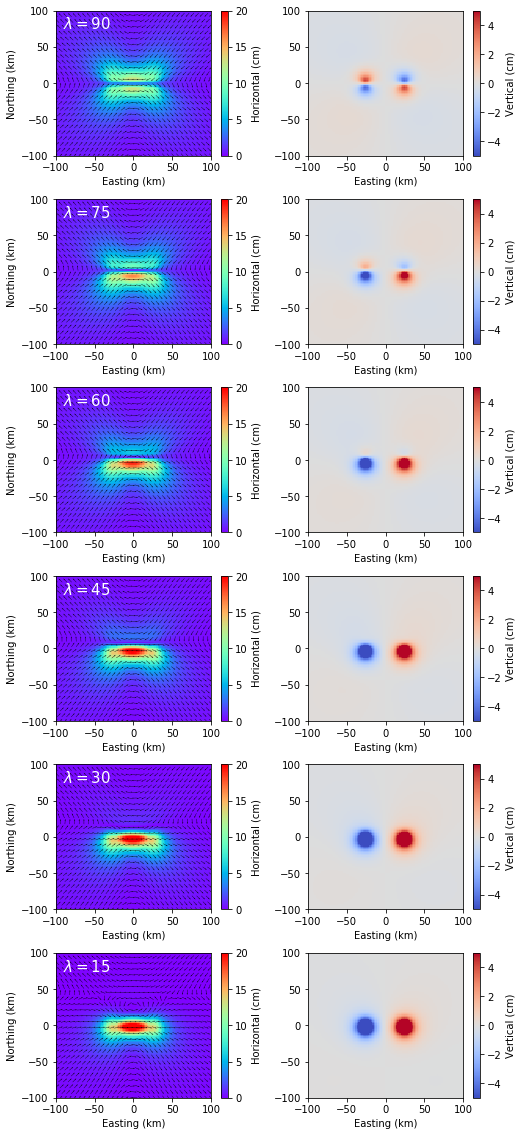

In [149]:
# make array ox axis objects to pass into function
fig=plt.figure(figsize=(8,20))
axis_array = fig.subplots(6,2)

#color limits
hmax=20
vmax=5

#make plots
for kdip in range(len(dips)):
    
    axis_horiz=axis_array[kdip,0]
    axis_vert=axis_array[kdip,1]
    
    plot_deformation(axis_horiz,axis_vert,x,y,ux[kdip,:],uy[kdip,:],uz[kdip,:],decimate,hmax,vmax,dips[kdip])

plt.subplots_adjust(wspace=0.3,hspace=0.3)

The deformation pattern changes substantially, as the dip shallows the symmetry in the horizontals is broken but recovers as the fault becomes horizontal. The verticals are mostly unchanged except for some stronger vertical signals at the corner of the fault as the dip shallows.

### Problem 4

Modify the previous okada function from above and add the 2 rotations

In [156]:
# fault parameters
strike=120
L=50  #legnth
W=30   #width

# In Okada's defintion "depth" is to the bottom left corenr of the fault plane, so a fault extending from 0 to 10km
# with a vertical dip, will ahve a "depth" of 10.
depth=20 

ss_slip=0 #strike-slip slip positive is rake =0 negative is rake=180
ds_slip=-5 #dip-slip slip positive is rake =90 negative is rake=270

alpha=2./3 #This is always 2/3
dip=45

#These are the 2 rotation matrices to "rotate" positions by strike angle and then"un rotate" output
theta=strike-90
theta=np.deg2rad(theta)
R=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
R2=np.array([[np.cos(-theta),-np.sin(-theta)],[np.sin(-theta),np.cos(-theta)]])


#Now the same code from problem 1
ux=np.zeros(Npoints**2)
uy=np.zeros(Npoints**2)
uz=np.zeros(Npoints**2)  #Initalizes output displacememnts

xout=np.zeros(Npoints**2)  #Initalizes otput coordinates
yout=np.zeros(Npoints**2)  #Initalizes otput coordinates

kout=0 #counter to track outputs

for kx in range(len(x)):
    for ky in range(len(y)):
        
        #This is the key here, define the rotated position
        xy=R.dot(np.array([[x[kx]], [y[ky]]]))
        
        success, u, grad_u = dc3dwrapper(alpha, [xy[0], xy[1], 0.0],
                                 depth, dip, [-L/2, L/2], [-W/2, W/2],
                                 [ss_slip, ds_slip, 0.0])
        
       
        # "un-rotate"
        urot=R2.dot(np.array([[u[0]], [u[1]]]))
        u[0]=urot[0]
        u[1]=urot[1]
    
        ux[kout] = u[0]
        uy[kout] = u[1]
        uz[kout] = u[2]
        
        xout[kout]=x[kx]
        yout[kout]=y[ky]
        
        kout+=1



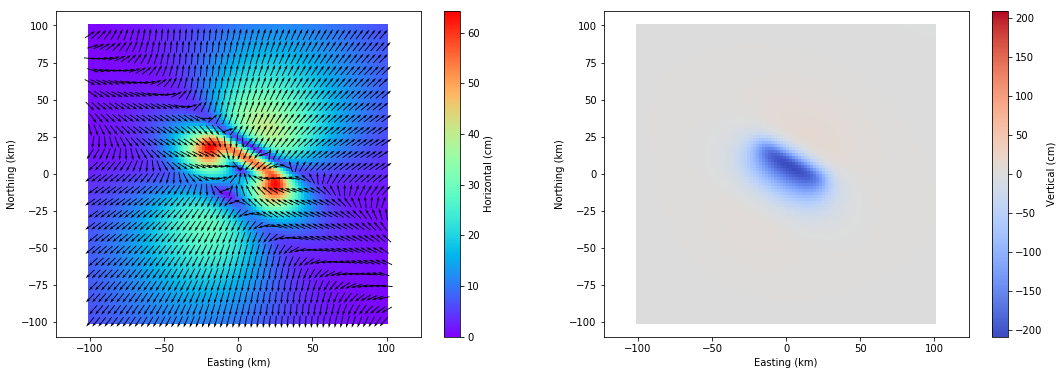

In [161]:
#plot using the same code as before

decimate=8 #if there are too many arrows, decimate
scatter_size=10
horiz=(ux**2+uy**2)**0.5

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.scatter(xout,yout,c=horiz*100,lw=0,s=scatter_size,vmin=0.0,vmax=horiz.max()*100,cmap='rainbow',marker='s')
cb=plt.colorbar()
cb.set_label('Horizontal (cm)')

#Quiver
i=np.arange(0,len(horiz),decimate)
plt.quiver(xout[i],yout[i],ux[i]/horiz[i],uy[i]/horiz[i],pivot='mid',linewidths=0.01, color='k',scale=30)

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

plt.axis('equal')


plt.subplot(122)
plt.scatter(xout,yout,c=uz*100,lw=0,s=scatter_size,vmin=-max(abs(uz))*100,vmax=max(abs(uz))*100,cmap='coolwarm',marker='s')
cb=plt.colorbar()
cb.set_label('Vertical (cm)')

#quiver
i=np.arange(0,len(horiz),decimate)

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

plt.axis('equal')

plt.show()

### Problem 5

Once more, recycle the code from P1. Note that the grad_u variable will be a 3x3 matrix at each point. You need to use this to find the strain tensor at each point. Also remember the invariants are:

$I_1=tr(\epsilon)$

and

$I_2=0.5*(tr(\epsilon^2)-[tr(\epsilon)]^2)$



In [162]:
# Fault description
L=50  #legnth
W=10   #width

# In Okada's defintion "depth" is to the bottom left corenr of the fault plane, so a fault extending from 0 to 10km
# with a vertical dip, will ahve a "depth" of 10.
depth=10 

ss_slip=5 #strike-slip slip positive is rake =0 negative is rake=180
ds_slip=0 #dip-slip slip positive is rake =90 negative is rake=270

alpha=2./3 #This is always 2/3
dip=90

In [183]:
#now loop over all the observation points
I1=np.zeros(Npoints**2)
I2=np.zeros(Npoints**2) #Initalizes output strain invariants


xout=np.zeros(Npoints**2)  #Initalizes otput coordinates
yout=np.zeros(Npoints**2)  #Initalizes otput coordinates

kout=0 #counter to track outputs

for kx in range(len(x)):
    for ky in range(len(y)):
        
        success, u, grad_u = dc3dwrapper(alpha, [x[kx], y[ky], 0.0],
                                 depth, dip, [-L/2, L/2], [-W/2, W/2],
                                 [ss_slip, ds_slip, 0.0])
        
        #derivatives of displacememnt
        uxx = grad_u[0,0]
        uxy = grad_u[0,1]
        uyx = grad_u[1,0]
        uxz = grad_u[0,2]
        uzx = grad_u[2,0]
        uyy = grad_u[1,1]
        uyz = grad_u[1,2]
        uzy = grad_u[2,1]
        uzz = grad_u[2,2]
        
        #finally the strains (recall it is symmetric)
        e11=uxx
        e12=0.5*(uxy+uyx)
        e13=0.5*(uxz+uzx)
        e22=uyy
        e23=0.5*(uyz+uzy)
        e33=uzz
        
        #In matrix form
        e=np.zeros((3,3))
        e[0,0]=e11
        e[0,1]=e12
        e[0,2]=e13
        e[1,1]=e22
        e[1,2]=e23
        e[2,2]=e33
        
        #and the symmetric bits
        e[1,0]=e[1,0]
        e[2,0]=e[2,0]
        e[2,1]=e[1,2]
        
        #finally the invaraints
        I1[kout]=np.trace(e)
        I2[kout]=0.5*(np.trace(e**2)-np.trace(e)**2)
        
        xout[kout]=x[kx]
        yout[kout]=y[ky]
        
        kout+=1

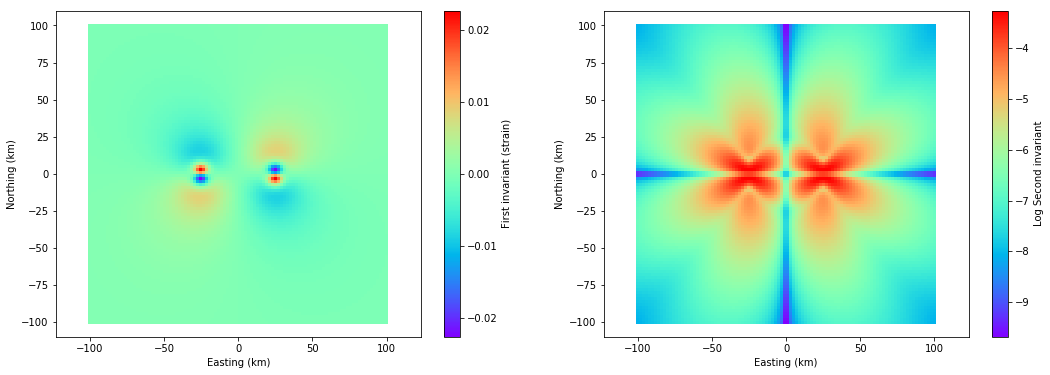

In [184]:
#plot them!

#I1=np.log10(I1)
I2=np.log10(I2)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.scatter(xout,yout,c=I1,lw=0,s=scatter_size,cmap='rainbow',marker='s')
cb=plt.colorbar()
cb.set_label('First invariant (strain)')

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

plt.axis('equal')


plt.subplot(122)
plt.scatter(xout,yout,c=I2,lw=0,s=scatter_size,cmap='rainbow',marker='s')
cb=plt.colorbar()
cb.set_label('Log Second invariant')

plt.xlim([x.min(),x.max()])
plt.ylim([y.min(),y.max()])
plt.ylabel('Northing (km)')
plt.xlabel('Easting (km)')

plt.axis('equal')

plt.show()

Not surprisingly the strains are largest, to first order, close to the fault. The volumetric strain (I1) is strongly affected by the vertical deformation at teh fault tips and is largest there. There is also an itneresting pattern of compression/expansion along strike consistent witht he notion that the strike-slip fault is "pulling" material in and also "pushing" material out of the way. I2 (more closely related to shear strain) is closest to the fault with an interesting lobate pattern. Of importance are the almost zero strain "nodal" planes along strike and at 90 degrees from it.